# Variables

Esta tabla contiene la información de los expresiones Variables.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('variables')

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic', 'variable__expertise_level']
TABLE_TARGET = 'variable__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-17 11:31:13.480021 Loading data ...
2025-01-17 11:31:23.127918 Data successfully load!!
2025-01-17 11:31:23.128687 Creating data cache files ...
2025-01-17 11:31:24.379621 Data cache files successfully created!!
Features shape: (753453, 5)
Target shape: (753453,)
As we can see the downloaded data contains a total of 753453 instances. For each instance we have 5 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753453 entries, 0 to 753452
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   variable__name_convention       753453 non-null  object
 1   variable__number_of_characters  753453 non-null  int64 
 2   variable__is_private            753453 non-null  bool  
 3   variable__is_magic              753453 non-null  bool  
 4   variable__expertise_level       753453 non-null  object
dtypes: bool(2), int64(1), object(2)
memory usage: 18.7+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 753453 entries, 0 to 753452
Series name: variable__expertise_level
Non-Null Count   Dtype 
--------------   ----- 
753453 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [28]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 47.22% instances for BEGINNER class and 52.78% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
variable__expertise_level         0
dtype: int64

In [5]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic


variable__expertise_level
-------------------------
0 instancias no tienen un valor para la columna variable__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,753453,7,Lower,483361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,753453.0,NaN,NaN,NaN,7.270548,5.320604,1.0,4.0,6.0,10.0,53.0
variable__is_private,753453,2,False,750100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,753453,2,False,750511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__expertise_level,753453,2,PROFESSIONAL,397636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(full_table, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 281852   37.408040
                    [10.0_inf] 204403   27.128832
                     [0.0_4.0) 161676   21.458007
                     [4.0_4.0] 105522   14.005120

variable__name_convention  count  percentage
                    Lower 483361   64.152774
                SnakeCase 168337   22.342070
                  CamelUp  57237    7.596625
                 CamelLow  21809    2.894540
                    Upper  17272    2.292379
         NoNameConvention   4263    0.565795
                  Discard   1174    0.155816

 variable__is_private  count  percentage
                False 750100   99.554982
                 True   3353    0.445018

 variable__is_magic  count  percentage
              False 750511   99.609531
               True   2942    0.390469

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (753453, 12)
Target shape: (753453,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

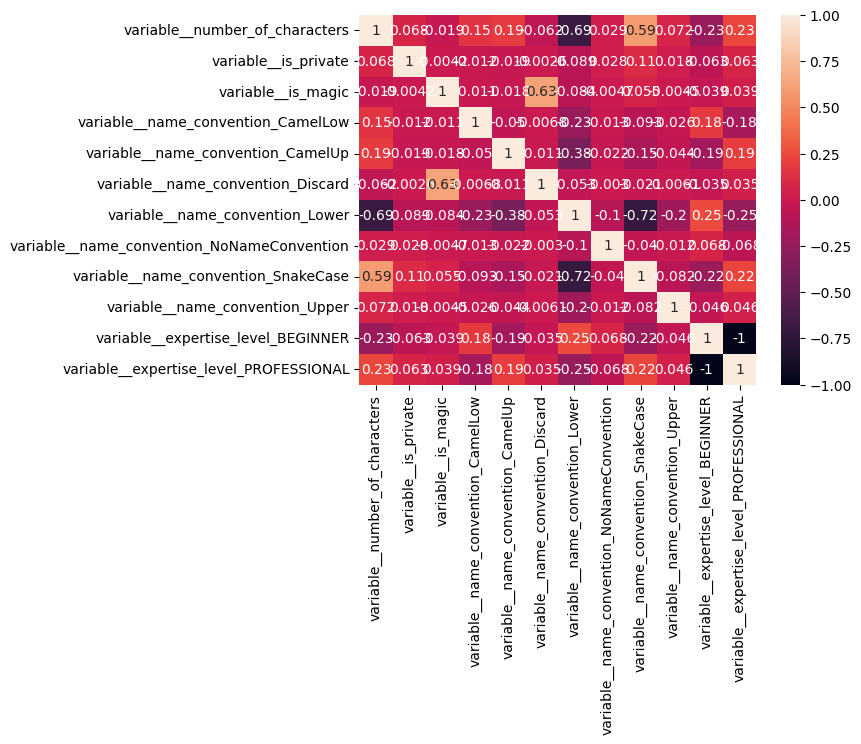

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variables (1 numerica, 2 booleanas y 1 categorica) se hara un analisis detallado

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

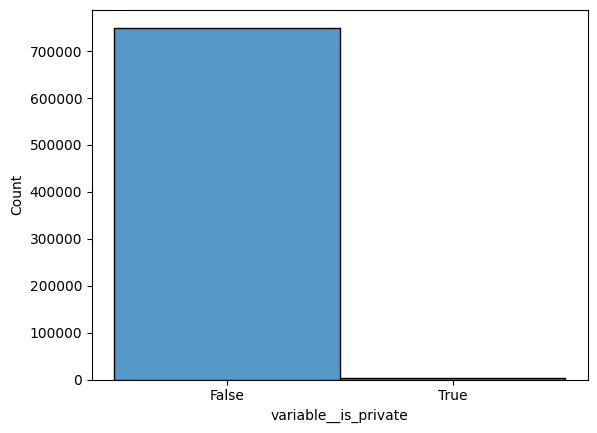

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [11]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 3353 valores verdaderos y 750100 valores falsos. Y, la desviación típica es de 0.06656109541654587
La frecuencia con la que programa puede tener la variable is_private a True es 0.0044501780469385615.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9955498219530614.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 99.55% de los items.
La variable variable__is_private toma el valor de 1.0 en un 0.445% de los items.


In [13]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_PROFESSIONAL
count,3353.000000,3353.0,3353.0,3353.0,3353.0,3353.0,3353.0,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000
mean,14.508202,1.0,0.0,0.0,0.0,0.0,0.0,0.037280,0.898598,0.064122,0.000895,0.999105
std,7.772612,0.0,0.0,0.0,0.0,0.0,0.0,0.189475,0.301905,0.245006,0.029903,0.029903
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
50%,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,20.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
max,45.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

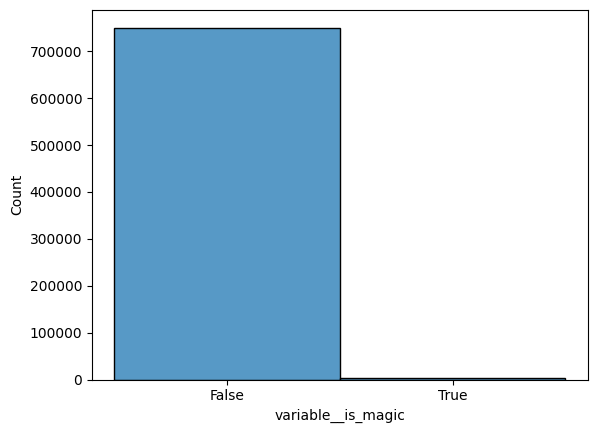

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 2942 valores verdaderos y 750511 valores falsos. Y, la desviación típica es de 0.06236543878912926
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0039046894763177.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9960953105236823.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.61% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.3905% de los items.


In [17]:
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_PROFESSIONAL
count,2942.000000,2942.0,2942.0,2942.0,2942.0,2942.000000,2942.0,2942.0,2942.000000,2942.000000,2942.000000,2942.000000
mean,5.149558,0.0,1.0,0.0,0.0,0.399048,0.0,0.0,0.588715,0.012237,0.163154,0.836846
std,3.572925,0.0,0.0,0.0,0.0,0.489786,0.0,0.0,0.492150,0.109959,0.369569,0.369569
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000
50%,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
75%,8.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
max,24.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 53. Con una media de 7.27.

<Axes: ylabel='variable__number_of_characters'>

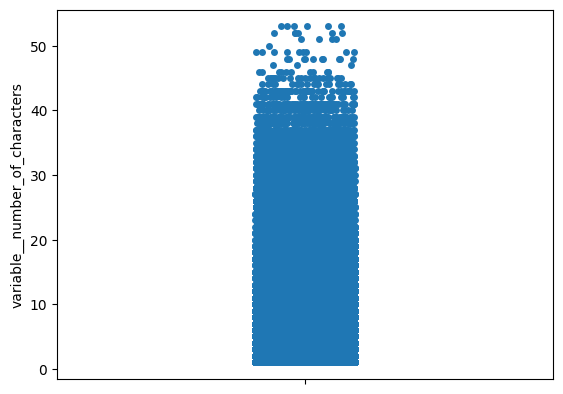

In [18]:
sns.stripplot(X['variable__number_of_characters'])

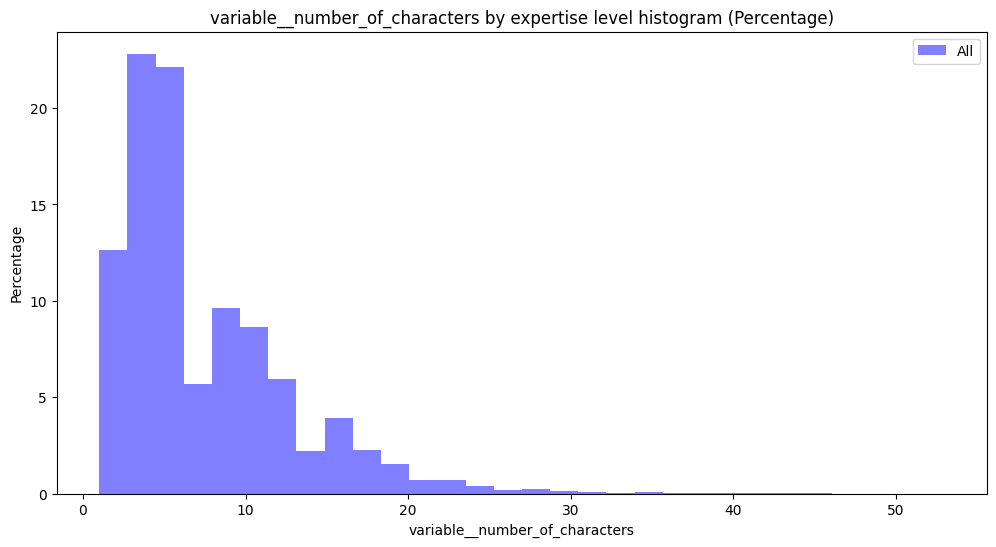

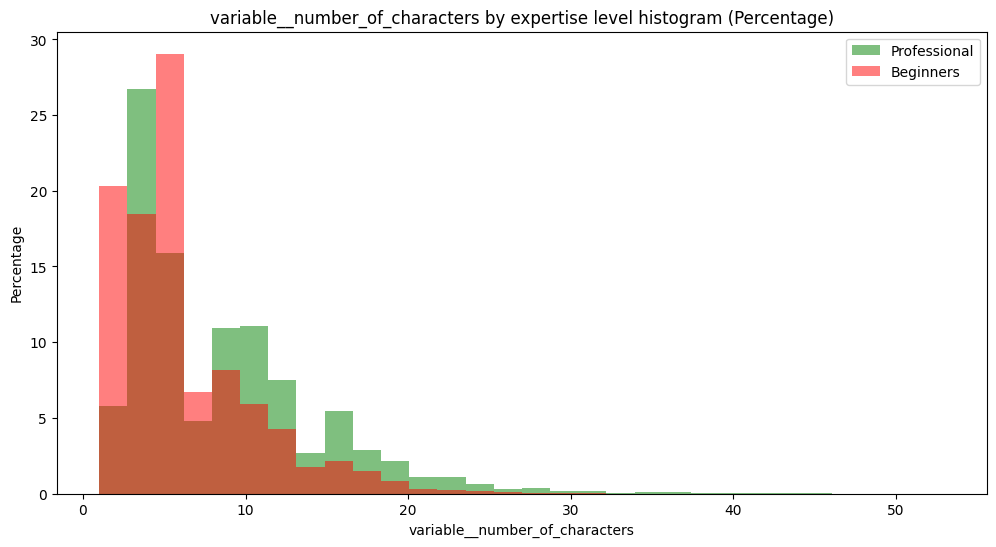

In [19]:
print_histogram(X, 'variable__number_of_characters', 'fstring__expertise_level', bins=30, include_all=True, include_beginners=False, include_experts=False, max_value=60)
print_histogram(X, 'variable__number_of_characters', 'variable__expertise_level', bins=30, include_all=False, max_value=60)

In [20]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7328108640817496
Rango valores atípicos extremos (Tukey): [-14.0,28.0]
Rango valores atípicos leves (Tukey): [-5.0,19.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.3076152265877976,178.7583877433602]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -14.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 24878 instancias tienen un valor para variable__number_of_characters superior a 19.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 3.302% del total de instancias.
+3.0IQR: 3063 instancias tienen un valor para variable__number_of_characters superior a 28.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 0.4065%

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 28.0 (Con un MC de 73 usamos Tuckey Extremo)

In [21]:
X[X['variable__number_of_characters'] > 28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_PROFESSIONAL
count,3063.000000,3063.000000,3063.0,3063.000000,3063.000000,3063.0,3063.0,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000
mean,33.660789,0.053542,0.0,0.013386,0.119817,0.0,0.0,0.013712,0.428991,0.424094,0.054848,0.945152
std,4.310854,0.225149,0.0,0.114938,0.324801,0.0,0.0,0.116312,0.495013,0.494285,0.227721,0.227721
min,29.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,33.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,36.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
max,53.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (4/4)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

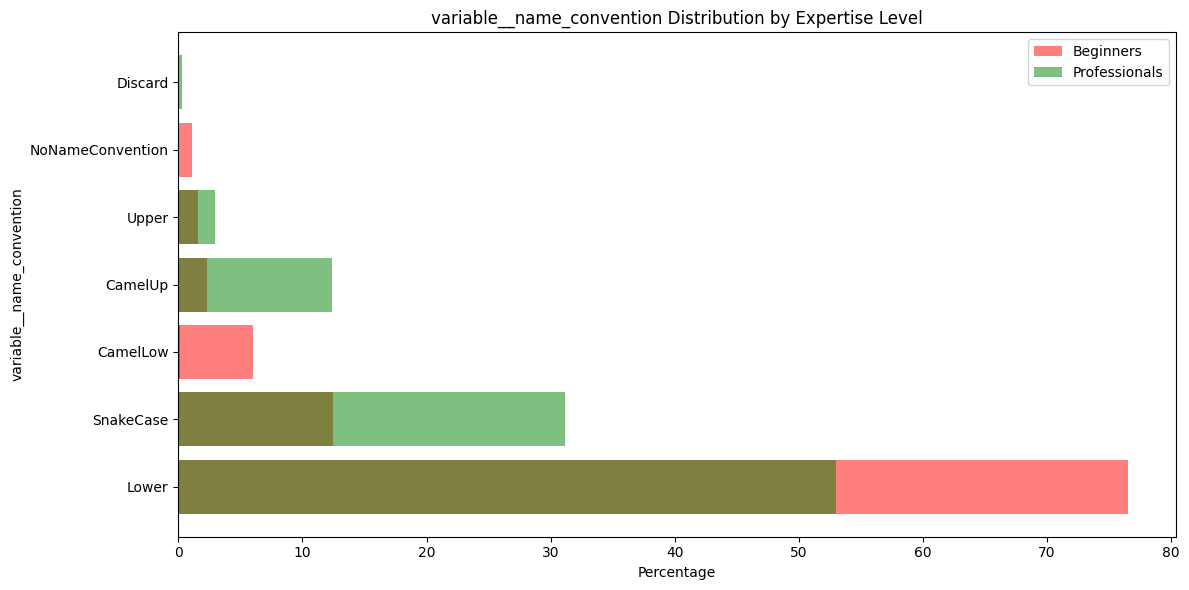

In [22]:
print_categorical_histogram(full_table, 'variable__name_convention',TABLE_TARGET, include_all=False)

In [23]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 64.15% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 22.34% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 7.597% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 2.895% de los items.
La variable variable__name_convention toma el valor de Upper en un 2.292% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.5658% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.1558% de los items.


In [24]:
print_values_usage_for_cat_var(full_table, 'variable__name_convention', NAMING_CONVENTION_VALUES)

La variable variable__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [25]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,variable__name_convention,variable__number_of_characters,variable__is_private,variable__is_magic,variable__expertise_level
4904,SnakeCase,36,True,False,PROFESSIONAL
4933,SnakeCase,27,True,False,PROFESSIONAL
4943,SnakeCase,27,True,False,PROFESSIONAL
4961,SnakeCase,27,True,False,PROFESSIONAL
4972,SnakeCase,27,True,False,PROFESSIONAL
...,...,...,...,...,...
703849,NoNameConvention,39,False,False,BEGINNER
704890,NoNameConvention,39,False,False,BEGINNER
709064,NoNameConvention,39,False,False,BEGINNER
711304,NoNameConvention,31,False,False,BEGINNER


### IMPORTANTE
Revisar los outliers detectados.

In [26]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,741.0,33.825912,7.684887,2.0,28.0,36.0,39.0,53.0
variable__is_private,741.0,0.469636,0.499414,0.0,0.0,0.0,1.0,1.0
variable__is_magic,741.0,0.012146,0.109610,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelUp,741.0,0.005398,0.073323,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Lower,741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_NoNameConvention,741.0,0.049933,0.217953,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,741.0,0.276653,0.447646,0.0,0.0,0.0,1.0,1.0
variable__name_convention_Upper,741.0,0.668016,0.471243,0.0,0.0,1.0,1.0,1.0


In [27]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,752712.0,7.244406,5.252022,1.0,4.0,6.0,10.0,52.0
variable__is_private,752712.0,0.003992,0.063058,0.0,0.0,0.0,0.0,1.0
variable__is_magic,752712.0,0.003897,0.062301,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,752712.0,0.028974,0.167733,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelUp,752712.0,0.076036,0.265055,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,752712.0,0.001560,0.039462,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Lower,752712.0,0.642159,0.479365,0.0,0.0,1.0,1.0,1.0
variable__name_convention_NoNameConvention,752712.0,0.005614,0.074718,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,752712.0,0.223368,0.416503,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Upper,752712.0,0.022289,0.147621,0.0,0.0,0.0,0.0,1.0
